Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization
from tqdm import tqdm
import time

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


define data path

In [2]:
data_path = r'C:\Users\cheng\OneDrive\Desktop\4012\data\4012image'

Loading the Data

In [3]:
class_names = ['mountain', 'buildings']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data():
    datasets= [os.path.join(data_path,'seg_train/seg_train'), os.path.join(data_path,'seg_test/seg_test')]
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
datasets= [os.path.join(data_path,'seg_train/seg_train'), os.path.join(data_path,'seg_test/seg_test')]
datasets

['C:\\Users\\cheng\\OneDrive\\Desktop\\4012\\data\\4012image\\seg_train/seg_train',
 'C:\\Users\\cheng\\OneDrive\\Desktop\\4012\\data\\4012image\\seg_test/seg_test']

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|                                                                                         | 0/2191 [00:00<?, ?it/s]

Loading C:\Users\cheng\OneDrive\Desktop\4012\data\4012image\seg_train/seg_train


 28%|██████████████████████▍                                                        | 124/437 [00:00<00:00, 622.05it/s]

Loading C:\Users\cheng\OneDrive\Desktop\4012\data\4012image\seg_test/seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 525/525 [00:00<00:00, 769.38it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

Looking to the detail of the dataset

In [8]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4703
Number of testing examples: 962
Each image is of size: (150, 150)


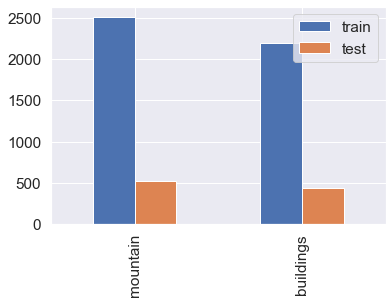

In [9]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [10]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [11]:
 """
 Optional Display a random image from the images array and its correspond label from the labels array.
 """
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

Show random images from the dataset

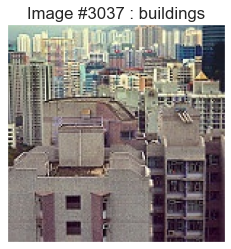

In [12]:
display_random_image(class_names, train_images, train_labels)

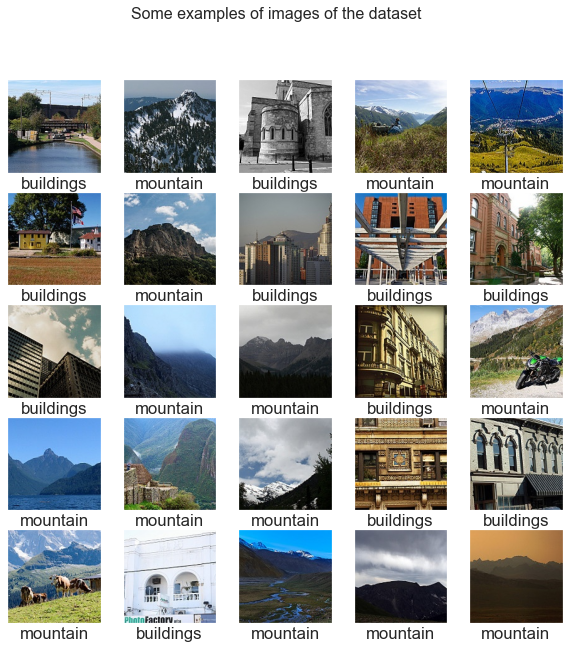

In [13]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
display_examples(class_names, train_images, train_labels)

configure the hyperparameters of the model

In [14]:
tf.random.set_seed(0)

#CNN
model = Sequential()
model.add(Conv2D(32,(3,3), padding= "SAME", input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding= "SAME", input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding= "SAME", input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))
opt =  tf.keras.optimizers.SGD(lr=0.005, momentum=0.0, decay=0.0, nesterov=False)

model.compile(loss='binary_crossentropy', optimizer = opt, metrics= ['accuracy'])
start_time = time.time()
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)
end_time = time.time()
train_time = end_time - start_time


C:\Users\cheng\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
30/30 [==============================] - 44s 1s/step - loss: 0.5541 - accuracy: 0.7286 - val_loss: 0.6799 - val_accuracy: 0.4623
Epoch 2/30
30/30 [==============================] - 42s 1s/step - loss: 0.3330 - accuracy: 0.8634 - val_loss: 0.6467 - val_accuracy: 0.7662
Epoch 3/30
30/30 [==============================] - 46s 2s/step - loss: 0.2704 - accuracy: 0.8894 - val_loss: 0.6336 - val_accuracy: 0.8342
Epoch 4/30
30/30 [==============================] - 43s 1s/step - loss: 0.2361 - accuracy: 0.9175 - val_loss: 0.6155 - val_accuracy: 0.7651
Epoch 5/30
30/30 [==============================] - 43s 1s/step - loss: 0.1917 - accuracy: 0.9409 - val_loss: 0.5933 - val_accuracy: 0.8268
Epoch 6/30
30/30 [==============================] - 44s 1s/step - loss: 0.1712 - accuracy: 0.9474 - val_loss: 0.6534 - val_accuracy: 0.5037
Epoch 7/30
30/30 [==============================] - 49s 2s/step - loss: 0.1728 - accuracy: 0.9494 - val_loss: 0.5554 - val_accuracy: 0.7173
Epoch 8/30
30/30 [==

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

In [16]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

Plot the accuracy and loss of between training set and the validation set

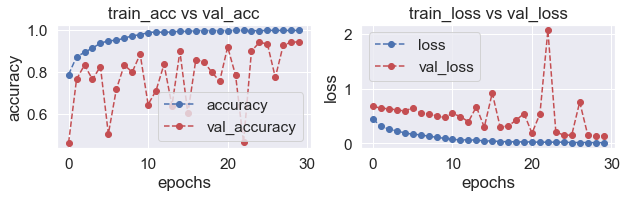

In [17]:
plot_accuracy_loss(history)

show the accuracy of the model

In [18]:
test_loss = model.evaluate(test_images, test_labels)

31/31 [==============================] - 3s 96ms/step - loss: 0.1592 - accuracy: 0.9376


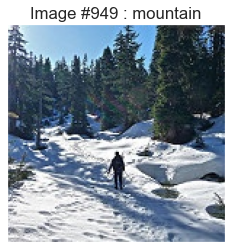

In [19]:
predictions = np.round(model.predict(test_images)).astype(int)    # Vector of probabilities
pred_labels = np.squeeze(predictions) 
display_random_image(class_names, test_images, pred_labels)

Print the mislabeled images 

In [20]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

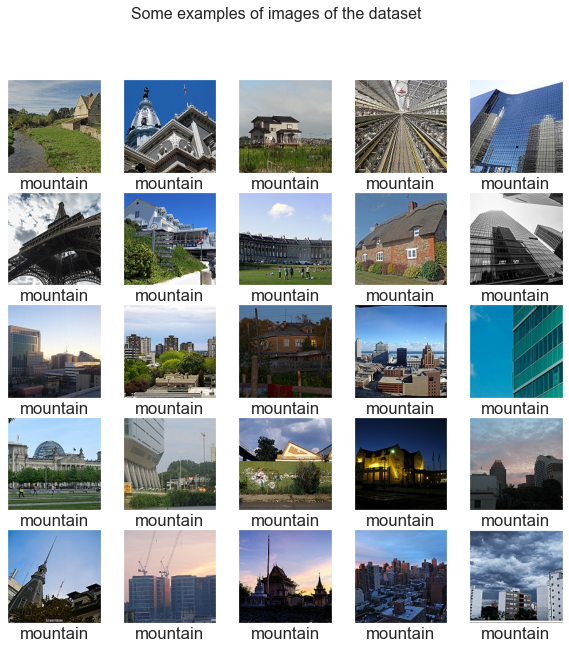

In [21]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [22]:
CM = confusion_matrix(test_labels, pred_labels)


print the confusion matrix

In [23]:
CM

array([[497,  28],
       [ 32, 405]], dtype=int64)

print the training time

In [24]:
print(train_time)

1356.5716881752014
